In [6]:
import nltk 
import numpy 
import os
import pandas as pd
import seaborn as sns
import re
import spacy
import en_core_web_sm
import glob
from spacy.matcher import Matcher
import csv
import os
import sys

import sox
import shutil
from operator import itemgetter
from itertools import groupby

import numpy as np
import shutil 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
nlp = spacy.load('en_core_web_sm')



In [7]:
import statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object


In [9]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected
    
    
    #return values
#val = np.array(values)
    #return statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)

In [10]:
input_dir = '/export/c12/afavaro/Transcriptions/CTP/'
#input_dir = '/export/c12/afavaro/Transcriptions/rainbow_passage_lower/'
#input_dir = '/export/c12/afavaro/CTP_transc_updated/'

In [11]:
path = []
for ok in os.listdir(input_dir):
    if ok.endswith('.txt'):
        path.append(os.path.join(input_dir, ok))
len(path)   

149

In [12]:
transcr = []
for file in path:
    with open(file, "r") as f:
        string_without_line_breaks = ""
        for line in f:
            stripped_line = line.rstrip()
            string_without_line_breaks += stripped_line
        transcr.append(string_without_line_breaks)
            

        

       # lines = f.readlines()[0]
       # transcr.append(mylist)
#(transcr)

In [13]:
speaker = [os.path.basename(file).split("_ses")[0] for file in path]
dataframe = {'idx':speaker, 'sentence': transcr}
df_10msec = pd.DataFrame(dataframe)
pd.set_option('display.max_colwidth', None)

In [14]:
label_seneca = pd.read_excel("/export/b14/afavaro/Acoustic_Features/DigiPsych_Prosody/Hospital_Analysis/Book3.xlsx")
label = label_seneca['Label'].tolist()
speak = label_seneca['Participant I.D.'].tolist() #id
spk2lab_ = {sp:lab for sp,lab in zip(speak,label)}
speak2__ = df_10msec['idx'].tolist()

In [15]:
etichettex = []
for nome in speak2__:
    if nome in spk2lab_.keys():
        lav = spk2lab_[nome]
        etichettex.append(([nome, lav]))
    else:
         etichettex.append(([nome, 'Unknown']))

In [16]:
label_new_ = []
for e in etichettex:
    label_new_.append(e[1])
df_10msec['label'] = label_new_

In [17]:
df = df_10msec

In [18]:
def uncertanty(text):
    
    '''Function design to capture the level of certainty of patients in providing the description
    of the image. To operationalize uncertanty I chose modals verbs as cue and interrogative marks. '''
    
    cont_con = 0
    if "?" in text:
        cont_con = cont_con + 1
    if "why" in text:
        cont_con = cont_con + 1
    if "might" in text:
        cont_con = cont_con + 1
    #if "can" in text:
      #  cont_con = cont_con + 1
    if "could" in text:
        cont_con = cont_con + 1
    if "may" in text:
        cont_con = cont_con + 1
    #if "not sure" in text:
       # cont_con = cont_con + 1     
   # if "I" in text:
      #  cont_con = cont_con + 1 
    if "um" in text:
        cont_con = cont_con + 1 
    if "uhm" in text:
        cont_con = cont_con + 1 
    if "ah" in text:
        cont_con = cont_con + 1 
    if "perhaps" in text:
        cont_con = cont_con + 1 
    #if "should" in text:
        #cont_con = cont_con + 1 
    if "looks like" in text:
        cont_con = cont_con + 1
        
    
    return cont_con

df['uncertanty'] = df['sentence'].apply(uncertanty)

In [19]:

def repetitions(text):
     
    '''Function design to capture the redundancy in the code.  To operationalize 
    redundancy I chose to count the repetitions. '''
    
    
    repetition = 0
    
    text = text.split()
    d = dict()
    
    for line in text:
        line = line.strip()
        line = line.lower()
        words = line.split(" ")
        for word in words:

            if word in d:
                d[word] = d[word] + 1
            else:
                d[word] = 1
    
    for key in list(d.keys()):
        if key != 'the' and key != "a" and key != "of" and key != "to" and key !="on" and key !="is" and key !="are" and key !="in" and key != "an":
            if d[key] > 1:
                repetition +=1

    return repetition


df['repetition'] = df['sentence'].apply(repetitions)


In [20]:
def informational_verb(text):
    
    '''Exhaustivness of the description operationalized by 
    counting how many (if any) salient items (nouns) are mentioned. '''
    
    cont_con = 0
    
    if "washing" in text:
        cont_con = cont_con + 1
    if "wash" in text:
        cont_con = cont_con + 1
    
    if "overflowing" in text:
        cont_con = cont_con + 1
      
    if "overflow" in text:
        cont_con = cont_con + 1
        
    if "hanging" in text:
        cont_con = cont_con + 1
    if "hang" in text:
        cont_con = cont_con + 1
        
    if "falling" in text:
        cont_con = cont_con + 1
    if "fall" in text:
        cont_con = cont_con + 1
        
    if "wearing" in text:
        cont_con = cont_con + 1
    if "wear" in text:
        cont_con = cont_con + 1
    if "running" in text:
        cont_con = cont_con + 1
        
    if "run" in text:
        cont_con = cont_con + 1
        
    if "drying" in text:
        cont_con = cont_con + 1
    if "dry" in text:
        cont_con = cont_con + 1
    if "paying attention" in text:
        cont_con = cont_con + 1
    if "reaching" in text:
        cont_con = cont_con + 1
    if "reach" in text:
        cont_con = cont_con + 1
    if "tipping" in text:
        cont_con = cont_con + 1
    if "tipp" in text:
        cont_con = cont_con + 1


    
    return cont_con

df['informational_verb'] = df['sentence'].apply(informational_verb)

In [21]:
def informational_content(text):

    '''Exhaustivness of the description operationalized by 
    counting how many (if any) salient actions (verbs) are mentioned. '''

    
    cont_con = 0
    
    if "mother" in text:
        cont_con = cont_con + 1
    if "sister" in text:
        cont_con = cont_con + 1
    if "cookie" in text:
        cont_con = cont_con + 1
    if "cookie jar" in text:
        cont_con = cont_con + 1
    if "curtains" in text:
        cont_con = cont_con + 1
    if "cabinet" in text:
        cont_con = cont_con + 1
    if "brother" in text:
        cont_con = cont_con + 1
    if "chair" in text:
        cont_con = cont_con + 1
    if "kitchen" in text:
        cont_con = cont_con + 1
    if "sink" in text:
        cont_con = cont_con + 1
    if "garden" in text:
        cont_con = cont_con + 1
    if "fall" in text:
        cont_con = cont_con + 1
    if "dishes" in text:
        cont_con = cont_con + 1     
    if "stool" in text:
        cont_con = cont_con + 1 
    if "poddle" in text:
        cont_con = cont_con + 1 
    if "shoes" in text:
        cont_con = cont_con + 1 
    if "apron" in text:
        cont_con = cont_con + 1 
    
    return cont_con

df['informational'] = df['sentence'].apply(informational_content)

def combine(df_): 
    
    '''Combination of repetitions and uncertanty. '''
    
    sum_ = df_['repetition'] +  df_["uncertanty"]  #rep + uncertainty
    df_["combined_uncertanty"] = sum_
    return df_

df = combine(df)

In [22]:
df

,idx,sentence,label,uncertanty,repetition,informational_verb,informational
0,NLS_85,"Uhm, I see what looks like a a kitchen with a couple of kids. Uhm, one of them climbing on a stool to get to cookie jar. looks like uhm the adult female is washing and washing dishes and the sink is overflowing. Uhm, looks like she's wearing maybe an apron. uhm, the kids are one is a girl, one is a boy. uhm, I see curtains on the window. i see the uhm an adult woman's feet are in the the water, it looks like. and she looks clueless as to what the kids are up to.",PD,3,12,6,8
1,PEC_19,"you know when the minute is up, right? yeah. okay, family, so you just want me to talk about the picture? okay, a a mother's son and a daughter trying to get cookies out of the cookie jar. the boys standing on a ladder, the mother's drying the dishes from the sink. uhm, the little girl has one our left cause she wants a cookie out of the cookie jar and uhm the mother's busy washing the dishes and dish, uhm the dishwater is overflowing on the floor. a the cup of saucer beside the mother who's washing, drying the dishes the little girl's waving again for a cookie and little boy got a cookie in his hand that he wants to give her but a the lids off the cookie jar. i'm not sure he's going a ech cause he's about the fall off the stool that he's standing on. mother doesn't know that the dish fan's overflowing but she's busy drying dishes and they're more just.",CTRL,3,23,7,7
2,NLS_61,"ah the boy is standing on the stool, trying to get a cookie jar and he's falling from the stool. the girl wants a cookie but she's reaching out for it but she's trying to tell him to be quiet. the mother is washing and drying the uhm dishes. the sink is on and is overflowing to the floor. there are a couple of uhm dishes on top of the table, of the cabinet actually. the window has its a blinds open. the curtains are open. you can see outside in the garden. it looks like a shack house in the back. there are few trees. there some dots on the floor. there's some hay on the left that almost looks like an animal. Uhm, the woman is wearing some type of like very short heels. she is wearing in a dress. ah she is, she looks like she is smiling.",FND,3,16,12,10
3,PEC_5,"two children, boy standing on stool reaching for cookies in the cookie jar. Mom standing in water. water's running out the sink. she's drying dishes. Uhm, in front she's standing in front of the window. Uhm, a window outside is a garden or garden path. Uhm, there are bowls, utensils on the countertop. two walls, it's like a spoon and a plate. Uhm, a curtains. Uhm, a counter top has open, has drawer has doors on the counter. two doors.",CTRL,0,7,6,7
4,AD_9,that you want me to describe what they're doing? little boy on ah on a a stool reaching for cookies. little girl waiting for him to give him her cookie. the mother's drying dishes while she's drying dishes ah the sink is overflowing and uhm that's it. that's what a puddle of water on the floor. Is there more? she's standing at the window the curtains of her drawing. is there anything else?,AD,3,11,6,6
...,...,...,...,...,...,...,...
144,NLS_60,"woman's washing dishes but the sink's overflowing. the children are stealing cookies from the cookie jar but they're falling off the stool. Uhm uhm looks like a pretty day outside. there's the grass is cut short. Uhm, mom is wearing a dress and an apron which is very old school. uhm, i'm so worried that boy's gonna fall uhm off the stool. this is one of those and i each study pictures and i've seen it before. Uhm, that's all i can really. it's a kitchen of a home and uhm i don't know why she's drying the dish when she should be stopping the water that's running on the floor. yes.",MS,3,8,12,8
145,NLS_66,"Oh my gosh, like kids getting out of the cookie jar. he's doing, uhm that mom's still doing dishes and the water is overflowing. the girl wants a cookie, hey brother go up and get me a cookie and that chair is gonna just go and that mom on m

In [23]:
df =df.drop(columns=['sentence']) 
df

,idx,label,uncertanty,repetition,informational_verb,informational
0,NLS_85,PD,3,12,6,8
1,PEC_19,CTRL,3,23,7,7
2,NLS_61,FND,3,16,12,10
3,PEC_5,CTRL,0,7,6,7
4,AD_9,AD,3,11,6,6
...,...,...,...,...,...,...
144,NLS_60,MS,3,8,12,8
145,NLS_66,ATX,3,27,2,6
146,PEC_43,CTRL,2,13,5,10
147,NLS_75,CTRL,3,18,10,9


In [24]:
df.to_csv('/export/b15/afavaro/Frontiers/submission/Classification/NLS_Data_set/cog_ling_helin.csv')

def ratio_info_rep_plus_uncert(df_): 
    
    '''Ratio between repetitions and uncertanty,
    where uncertainty is operationalized as repetition + uncertanty. '''
    
    summation = df_['repetition'] + df_["uncertanty"]
    ratio = df_['informational'] / summation #info / rep + uncertanty
    df_["ratio_info_rep_plus_uncert"] = ratio
    
    return df_

df = ratio_info_rep_plus_uncert(df)

def ratio_rep_certanty(df_): 
    
    '''Function designed to measure the ratio between repetitions and uncertanty,
    where uncertainty is intended as uncertainty. '''
    
    division = df_['repetition'] / df_["uncertanty"] # repetition / uncertainty
    df_["ratio_rep_certanty"] = division
    
    return df_

df = ratio_rep_certanty(df)

def ratio_info_repetition(df_): 
    
    '''Function designed to measure the ratio between repetitions and uncertanty,
    where uncertainty is operationalized as repetition + uncertanty. '''
    
    ratio = df_['informational'] / df_['repetition'] # info / rep
    df_["ratio_info_repetition"] = ratio
    
    return df_

df = ratio_info_repetition(df)

def ratio_info_uncer(df_): 
    
    '''Function designed to measure the ratio between repetitions and uncertanty,
    where uncertainty is operationalized as repetition + uncertanty. '''
    
    ratio = df_['informational'] / df_["uncertanty"] # info / uncert
    df_["ratio_info_uncer"] = ratio
    
    return df_

df = ratio_info_uncer(df)

In [53]:
#nlp = spacy.load('en_core_web_sm')

In [54]:
#df['sentence'] = df['sentence'].str.lower()

In [18]:
#df = df.rename(columns={"informational_verb": "Uncertainty\n(Interrogative-Conditional)\nCTP task"})
#df = df.rename(columns={r"informational_verb": "Informativeness [events]\nCTP task"})
df = df.rename(columns={r"informational": "Informativeness [entities]\nCTP task (NLS)"})
#df.to_csv("/export/b14/afavaro/SLT_submission/cognitive/data_frame.csv")


In [56]:
#df

In [19]:
task = df.columns[3:].values.tolist()
len(task)

4

In [20]:
grouped = df.groupby('label')


#grouped = data_frame.groupby('labels')

control = grouped.get_group("CTRL") 
parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")
others =  pd.concat([ grouped.get_group('CBS'),  
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD'), 
                      grouped.get_group('PSP'), grouped.get_group('MIM')])

#grouped.get_gro/
#grouped.get_group('MS'),

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [21]:
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_102")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_98")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_95")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_87")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_85")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_57")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.idx.str.contains("NLS_21")]


In [22]:
task = df.columns[3:].values.tolist()

alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(df.columns[3:])])
others_all_feat = np.array([others[feat] for feat in np.array(df.columns[3:])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(df.columns[3:])])
control_all_feat =np.array([control[feat] for feat in np.array(df.columns[3:])])
#ataxia_all_feat =np.array([ataxia[feat] for feat in np.array(df.columns[3:])])

In [74]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i])} \n\n'))

with open('/export/b14/afavaro/SLT_submission/cognitive/results/cn_vs_pd.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

In [75]:
with open('/export/b14/afavaro/SLT_submission/cognitive/results/cn_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, control_all_feat, others_all_feat, "control vs.", "others")
    

In [76]:
with open('/export/b14/afavaro/SLT_submission/cognitive/results/pd_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")
    

In [77]:
with open('/export/b14/afavaro/SLT_submission/cognitive/results/ad_vs_otr.txt', 'w') as f:

    
    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
    

In [78]:
with open('/export/b14/afavaro/SLT_submission/cognitive/results/ad_vs_cn.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
    

In [79]:
with open('/export/b14/afavaro/SLT_submission/cognitive/results/ad_vs_pd.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")

In [80]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

In [81]:
def compute_best_scores(lista):    

    values = []
    critical = []
    final = [] 
    
    for l in lista:
       # print(l)
        ok = l.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(num)

    for value in values:
        if float(value) < 0.05:
            critical.append(value)

    for li in lista:
        for cri in critical:
            if cri in li:
                final.append(li)

    return final

In [82]:
kruskal_1 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ad_vs_cn.txt')

kruskal_1_ = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ry_ad_vs_cn.txt')
kruskal_1__= read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/rt_ad_vs_cn.txt')
kruskal_2 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ad_vs_otr.txt')
kruskal_3 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ad_vs_pd.txt')
kruskal_4 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/cn_vs_otr.txt')
kruskal_4_ = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ry_cn_vs_otr.txt')
kruskal_4__ = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/ry_cn_vs_otr.txt')
kruskal_4__ = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/rt_cn_vs_otr.txt')
kruskal_5 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/cn_vs_pd.txt')
kruskal_5_ = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/rt_cn_vs_pd.txt')
kruskal_6 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/pd_vs_otr.txt')
#best_krusk = compute_best_scores(kruskal)
kruskal_4

['kruskal results for uncertanty control vs. others KruskalResult(statistic=4.744387015569396, pvalue=0.029394023881265607) ',
 'kruskal results for repetition control vs. others KruskalResult(statistic=1.4867567712630687, pvalue=0.22272034769126753) ',
 'kruskal results for informational_verb control vs. others KruskalResult(statistic=4.107901126651138, pvalue=0.04268330240503464) ',
 'kruskal results for informational control vs. others KruskalResult(statistic=7.061428799431602, pvalue=0.007876115674316305) ']

In [70]:
holm_correction(kruskal_1 + kruskal_1_+ kruskal_1__)

(['kruskal results for RT alzheimers vs. controls 0.006675968568923189 '],
 [0.04673177998246233])

In [71]:
comp

0.11981132075471697

In [54]:
kruskal_1

['kruskal results for uncertanty alzheimers vs. controls 0.03456636877932838 ',
 'kruskal results for repetition alzheimers vs. controls 0.06137402163025788 ',
 'kruskal results for informational_verb alzheimers vs. controls 0.6432898686545967 ',
 'kruskal results for Informativeness [entities]',
 'CTP task alzheimers vs. controls 0.06863104357534053 ']

In [43]:
holm_correction(kruskal_2)


ValueError: could not convert string to float: 'KruskalResult(statistic=0.019907628603291188,'

In [73]:
o = kruskal_4__[:1]
o

['kruskal results for Rhythm_std control vs. others 0.9505490015219512 ']

In [74]:
holm_correction(kruskal_3)

([], [])

In [75]:
holm_correction(kruskal_4+ kruskal_4_ + o)

(['kruskal results for informational control vs. others 0.007876115674316305 '],
 [0.047256694045897836])

In [ ]:
holm_correction(kruskal_5_)

In [42]:
holm_correction(kruskal_6)

([], [])

In [49]:
az = (alzheimer['informational'].tolist())
az = np.array([x for x in az if x !='None'])
az = az.astype(float)
ctrl =(control['informational'].tolist())
ctrl = np.array([x for x in ctrl if x !='None'])
ctrl = ctrl.astype(float)

pd =(parkinson_['informational'].tolist())
pd = np.array([x for x in pd if x !='None'])
pd = pd.astype(float)


otr =(others['informational'].tolist())
otr = np.array([x for x in otr if x !='None'])
otr = otr.astype(float)


mean_az = np.mean(az)
st_ad = np.std(az)
mean_ctrl =  np.mean(ctrl)
st_ctrl = np.std(ctrl)



mean_pd = np.mean(pd)
st_pd = np.std(pd)


mean_otr = np.mean(otr)
st_otr = np.std(otr)

TypeError: list indices must be integers or slices, not str

In [32]:
task

['uncertanty', 'repetition', 'informational_verb', 'informational']

In [33]:
df = df.rename(columns={"informational": "informativeness [entities]\nCTP task"})

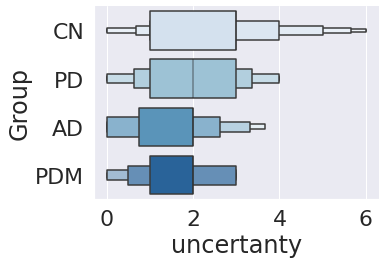

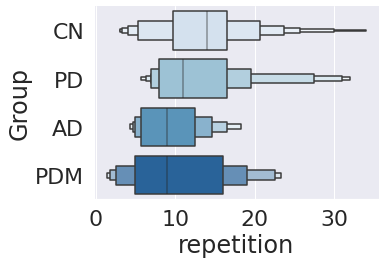

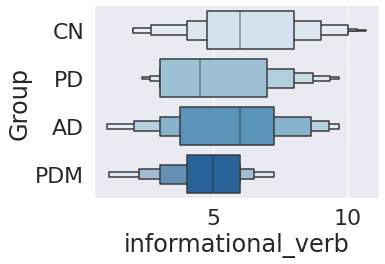

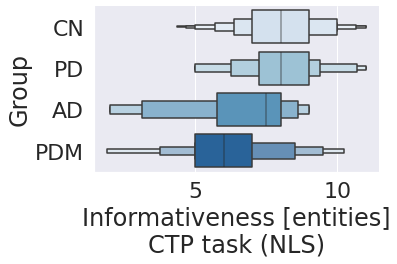

In [23]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    alz = []
    #ataxia = []
    others= []
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i], alzheimer_all_feat[i], others_all_feat[i]])
    data = data.tolist()

    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    #[ataxia.append('ATX') for value in range(len(ataxia_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    [alz.append('AD') for value in range(len(alzheimer_all_feat[i]))]
    [others.append('PDM') for value in range(len(others_all_feat[i]))]

    lista = controls+parkinson+alz+others
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    plt.savefig(f'/export/b14/afavaro/SLT_submission/Final_plot_SLT/{nome}_', facecolor='white', dpi=600)

In [57]:
#compute effect size
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
import numpy as np
import scipy.stats as st


def conf_interval(list_of_values):
    return st.t.interval(alpha=0.95, df=len(list_of_values)-1, loc=np.mean(list_of_values), scale=st.sem(list_of_values)) 
   


def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [60]:
az = (alzheimer['uncertanty'].tolist())
az = np.array([x for x in az if x !='None'])
az = az.astype(float)
ctrl =(control['uncertanty'].tolist())
ctrl = np.array([x for x in ctrl if x !='None'])
ctrl = ctrl.astype(float)
atx =(ataxia['combined_uncertanty'].tolist())
atx = np.array([x for x in atx if x !='None'])
atx = atx.astype(float)
pd =(parkinson_['combined_uncertanty'].tolist())
pd = np.array([x for x in pd if x !='None'])
pd = pd.astype(float)


mean_atx = np.mean(atx)
st_atx = np.std(atx)
mean_az = np.mean(az)
st_ad = np.std(az)
mean_ctrl =  np.mean(ctrl)
st_ctrl = np.std(ctrl)
mean_pd = np.mean(pd)
st_pd = np.std(pd)


array([1., 2., 4., 0., 1., 0., 2., 0., 2.])

In [71]:
task

['uncertanty',
 'repetition',
 'informational_verb',
 'informational',
 'combined_uncertanty',
 'ratio_info_rep_plus_uncert',
 'ratio_rep_certanty',
 'ratio_info_repetition',
 'ratio_info_uncer',
 'ratio_nouns_verb',
 'ratio_nouns_adv',
 'ratio_adv_noun',
 'ratio_verb_noun',
 'ratio_verb_adj',
 'ratio_adj_verb',
 'ratio_noun_adj',
 'ratio_adj_noun',
 'ratio_noun_numeral',
 'ratio_numeral_noun',
 'ratio_adj_numeral']

In [72]:
import numpy as np
from sklearn import metrics
import sklearn


def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))


In [84]:
task

['uncertanty', 'repetition', 'informational_verb', 'informational']

In [83]:
compute_auc(controaa_all_feat, others_all_feat)

0.69
0.61
0.68
0.74


In [85]:
(7.06-1)/(56-2)

0.11222222222222221